# Integration Work
Transmissions over Integrations

In [1]:
from AD_analysis import *
import Atmospheric_diffraction as atm_shift
import numpy as np
import matplotlib as mpl
import Integ_analysis as int_analysis
import Transmission_calculation as trans_calc

The code mainly draws on the following steps, with key variables described:

>analysis=AD_analysis()

This gets the class

====
>analysis.load_band('LR','NIR','IY','H',sampling=1 * u.nm) 

This function loads the MOSAIC wavelengths that will be used for the shift calculations. 

First variable is LR or HR

Second variable is NIR or VIS

Third/fourth variables are the start/end bands. These can be the same, e.g. 'B', 'B'.

====
>analysis.load_airmasses(ZA_range=[0,10,20,30,40,50,60])

OR
>analysis.load_airmasses(HA_range=[0,1,2],targ_dec= 0 * u.degree)
This function loads the airmasses to calculate the shifts for.

OR
>analysis.load_airmasses(airmasses=[1,1.1,1.2])

Can use 1) zenith angles (ZA_range)
OR 2) hour angles (HA_range); the declination is -25.3 deg by default, change with targ_dec=X
OR 3) raw airmasses (airmasses)

For integrations, only regularly spaced HA vals in 2) makes physical sense and are supported

====
>analysis.calculate_shifts(guide * u.micron, aperture_val * u.micron, centred_on=centre_index,reposition = False)

This function calculates the shifts for the generated wavelengths and airmasses

guide_waveref is the telescope guide wavelength reference

aperturecentre_waveref is the aperture wavelength reference for original position

centring_index is at which index of the HA_range we centre the aperture on the aperturecentre_waveref

reposition = TRUE or FALSE is a setting that determines whether the aperture is aligned on the aperture wavelength reference for each sequential airmass. For integrations this needs to be false

====
>analysis.make_aperture(type,method="numerical moffat")

This function generates the aperture to use in the transmission calculations

type can be "hexagons" or "circle" to represent the aperture

method can be 1) analytical gaussian, 2) numerical gaussian, 3) numerical moffat, or 4) numerical durham, and determines how the transmission is calculated

====
>analysis.calculate_transmissions()

This function calculates the transmissions for the shifts using one of several methods

====

These functions can be used in many ways for different plots/analysis of transmissions/shifts

Most of these function have other optional variables, e.g., scale for the numerical simulations, whether to change FWHM with airmass and wavelength. These are described in the relevant function notes

# Integration Transmission Graphs

## Transmission vs Wavelength for various aperture centres

In [2]:
#Following function plots integration transmission average for single mode observations
def plot_integ(analysis,guide,aperture_centres,parallatic=True,normalise="no AD",centring="mid HA"):  
    """
    normalise: string, "none", "no ad"
        what to normalise the transmission to; either no normalisation, or relative to the no AD case (perfect ADC)

    """
    weights = np.arange(0, len(aperture_centres)+1)
    norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.RdBu)

    integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,aperture_centres,guide,parallatic,centring)
    
    plt.figure(figsize=[7,5])
    plt.axvline(x=guide.value*1000,color='black',linewidth=0.7,label='Guide WL = {} at {}'.format(guide,analysis.input['centred_on']))

    if normalise == "none":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i),label='Aperture Centre = {}'.format(aperture_centres[count].round(3)),color=cmap.to_rgba(len(aperture_centres)-count))
        plt.ylabel("Mean Transmission")        
        plt.plot(analysis.output['wavelengths'],opt_transmission,label='No AD Transmission',color='black',linestyle='--')
    if normalise == "no AD":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {}'.format(aperture_centres[count].round(3)),color=cmap.to_rgba(len(aperture_centres)-count))
        plt.axhline(y=1,label='No AD Transmission, {}'.format(analysis.input['method']),color='black',linestyle='--')
        plt.ylabel("Mean Transmission Relative to No AD")
        
    plt.legend()   
    plt.title("Dec: {}, HA: {}-{}h, {} {}".format(analysis.input['targ_dec'],analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['regime'],analysis.input['WL_label']))
    plt.ylim(0,1.1)
    plt.xlabel("Wavelength (nm)")

Target goes below Horizon above/below HA of +/- 6.0h
Target goes below Horizon above/below HA of +/- 6.0h


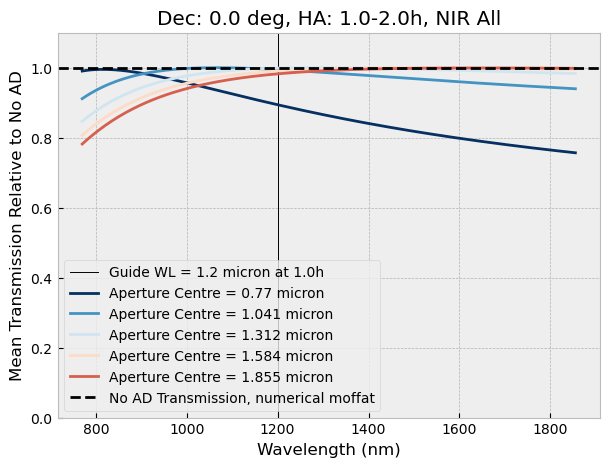

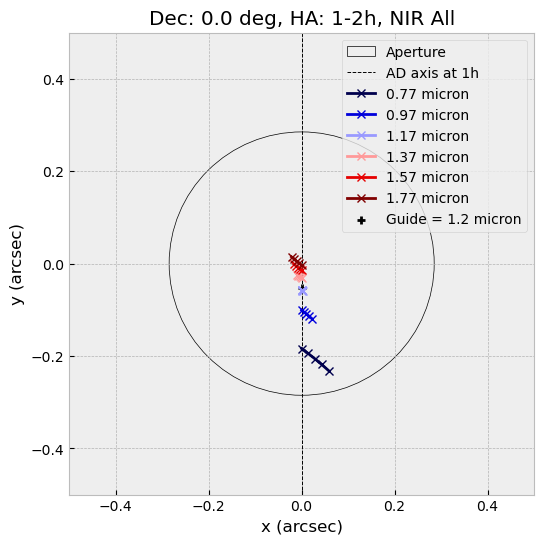

In [3]:
#Following is what is needed to plot the Trans vs Wavelength graphs for various aperture centres
#VIS
analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=5*u.nm) #Change for wanted observing mode

#HA:
targ_dec=0*u.deg
analysis.load_airmasses(HA_range=np.linspace(1,2,21),targ_dec=targ_dec)

#Aperture values to use:
aperture_centres=np.around(np.linspace(min(analysis.output['wavelengths']).to(u.micron).value,max(analysis.output['wavelengths']).to(u.micron).value,5)*u.micron,3)
#analysis.output['aperture_diameter']=.89*u.arcsec
#Need to generate the apertures
analysis.make_aperture("hexagons",method="numerical moffat")

#Guide in NIR:
guide=1.2 * u.micron

#Function generates shifts and transmissions, and creates a plot for the WL vs Trans described above
plot_integ(analysis,guide,aperture_centres,centring=0)

#Following set of functions do the same but create a track plot
#load_band, and load_airmasses are repeated as we most likely want a plot with less information (lower sampling and less HA values)
analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=200*u.nm) #Change for wanted observing mode
#x
analysis.load_airmasses(HA_range=[1,1.25,1.5,1.75,2],targ_dec=targ_dec)
analysis.calculate_shifts(guide,1.85*u.micron,centring=0)
int_analysis.track_plot(analysis,y_axis="centring")

Target goes below Horizon above/below HA of +/- 6.0h
Target goes below Horizon above/below HA of +/- 6.0h


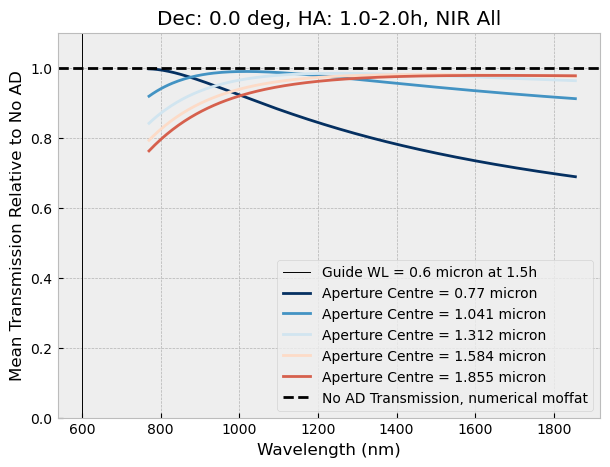

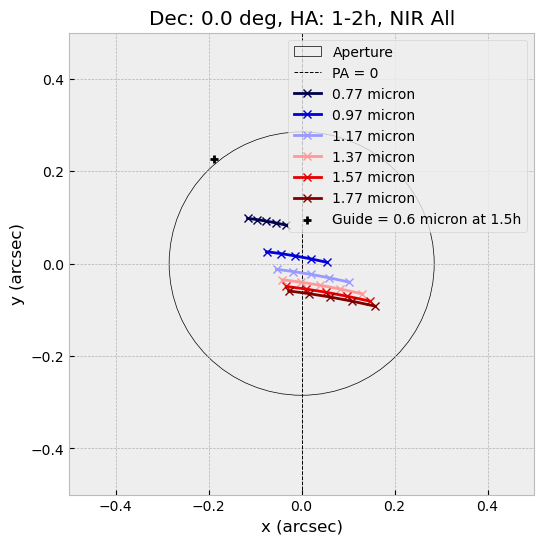

In [4]:
#Following is what is needed to plot the Trans vs Wavelength graphs for various aperture centres
#VIS
analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=5*u.nm) #Change for wanted observing mode

#HA:
targ_dec=0*u.deg
analysis.load_airmasses(HA_range=np.linspace(1,2,21),targ_dec=targ_dec)

#Aperture values to use:
aperture_centres=np.around(np.linspace(min(analysis.output['wavelengths']).to(u.micron).value,max(analysis.output['wavelengths']).to(u.micron).value,5)*u.micron,3)

#Need to generate the apertures
analysis.make_aperture("hexagons",method="numerical moffat")

#Guide in VIS
guide=.6 * u.micron

#Function generates shifts and transmissions, and creates a plot for the WL vs Trans described above
plot_integ(analysis,guide,aperture_centres,centring="mid HA")

#Following set of functions do the same but create a track plot
#load_band, and load_airmasses are repeated as we most likely want a plot with less information (lower sampling and less HA values)
analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=200*u.nm) #Change for wanted observing mode
#analysis.output['aperture_diameter']=.89*u.arcsec
analysis.load_airmasses(HA_range=[1,1.25,1.5,1.75,2],targ_dec=targ_dec)
analysis.calculate_shifts(guide,1.04*u.micron,centring="mid HA")
int_analysis.track_plot(analysis,y_axis="PA")

## Parallel-All Mode Graph

In [5]:
#Following function plots integration transmission average for parallel observations
def plot_parallel_integ_all(analysis,aperture_B,aperture_V,aperture_R,aperture_NIR,guide,normalise="no AD",method="numerical moffat",aperture="circle",sample_val=[1*u.nm,1*u.nm],scale_val=0.01,parallatic=True,centring="mid HA",VIS_diameter=0.72*u.arcsec):  
    weights_r = np.arange(0, len(aperture_NIR)+2)
    norm_r = mpl.colors.Normalize(vmin=min(weights_r), vmax=max(weights_r))
    cmap_red = mpl.cm.ScalarMappable(norm=norm_r, cmap=mpl.cm.Purples)
    weights_b = np.arange(0, len(aperture_B)+2)
    norm_b = mpl.colors.Normalize(vmin=min(weights_b), vmax=max(weights_b))
    cmap_blue = mpl.cm.ScalarMappable(norm=norm_b, cmap=mpl.cm.Blues)
    weights_g = np.arange(0, len(aperture_V)+2)
    norm_g = mpl.colors.Normalize(vmin=min(weights_g), vmax=max(weights_g))
    cmap_green = mpl.cm.ScalarMappable(norm=norm_g, cmap=mpl.cm.Greens)
    weights_vr = np.arange(0, len(aperture_R)+2)
    norm_vr = mpl.colors.Normalize(vmin=min(weights_vr), vmax=max(weights_vr))
    cmap_vr = mpl.cm.ScalarMappable(norm=norm_vr, cmap=mpl.cm.Reds)
       
    analysis.load_band("LR","VIS","B","B",sampling=sample_val[0])
    analysis.output['aperture_diameter']=VIS_diameter
    analysis.make_aperture(aperture,method,scale_val)
    integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,aperture_B,guide,parallatic,centring)
    
    plt.figure(figsize=[7,5])
    plt.axvline(x=guide.value*1000,color='black',linewidth=0.7,label='Guide WL = {} at {}'.format(guide,analysis.input['centred_on']))

    if normalise == "none":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i),label='V Aperture Centre = {}'.format(aperture_B[count]),color=cmap_blue.to_rgba(len(aperture_B)-count))
        plt.plot(analysis.output['wavelengths'],opt_transmission,color='black',linestyle='--')
    if normalise == "no AD":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i)/np.array(opt_transmission),label='V Aperture Centre = {}'.format(aperture_B[count]),color=cmap_blue.to_rgba(len(aperture_B)-count))

    analysis.load_band("LR","VIS","V","V",sampling=sample_val[0])
    analysis.output['aperture_diameter']=VIS_diameter
    analysis.make_aperture(aperture,method,scale_val)
    integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,aperture_V,guide,parallatic,centring)
    if normalise == "none":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i),label='G Aperture Centre = {}'.format(aperture_V[count]),color=cmap_green.to_rgba(len(aperture_V)-count))
        plt.plot(analysis.output['wavelengths'],opt_transmission,color='black',linestyle='--')
    if normalise == "no AD":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i)/np.array(opt_transmission),label='G Aperture Centre = {}'.format(aperture_V[count]),color=cmap_green.to_rgba(len(aperture_V)-count))
            
    analysis.load_band("LR","VIS","R","R",sampling=sample_val[0])
    analysis.output['aperture_diameter']=VIS_diameter
    analysis.make_aperture(aperture,method,scale_val)
    integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,aperture_R,guide,parallatic,centring)
    if normalise == "none":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i),label='R Aperture Centre = {}'.format(aperture_R[count]),color=cmap_vr.to_rgba(len(aperture_R)-count))
        plt.plot(analysis.output['wavelengths'],opt_transmission,color='black',linestyle='--')
    if normalise == "no AD":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i)/np.array(opt_transmission),label='R Aperture Centre = {}'.format(aperture_R[count]),color=cmap_vr.to_rgba(len(aperture_R)-count))

    analysis.load_band("LR","NIR","IY","H",sampling=sample_val[1])
    analysis.make_aperture(aperture,method,scale_val)
    integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,aperture_NIR,guide,parallatic,centring)
    if normalise == "none":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i),label='NIR Aperture Centre = {}'.format(aperture_NIR[count]),color=cmap_red.to_rgba(len(aperture_NIR)-count))
        plt.ylabel("Mean Transmission")        
        plt.plot(analysis.output['wavelengths'],opt_transmission,label='No AD Transmission',color='black',linestyle='--')
    if normalise == "no AD":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i)/np.array(opt_transmission),label='NIR Aperture Centre = {}'.format(aperture_NIR[count]),color=cmap_red.to_rgba(len(aperture_NIR)-count))
        plt.axhline(y=1,label='No AD Transmission, {}'.format(analysis.input['method']),color='black',linestyle='--')
        plt.ylabel("Mean Transmission Relative to No AD")
        
    plt.ylim(0,1.1)
    plt.xlabel("Wavelength (nm)")
    plt.title("Dec: {}, HA: {}-{}h, NIR All + VIS All".format(targ_dec,analysis.input['HA_range'][0],analysis.input['HA_range'][-1]))
    plt.legend()

/Users/Jay.Stephan/Library/CloudStorage/OneDrive-ScienceandTechnologyFacilitiesCouncil/Documents/MOSAIC/AD/AD-Code/Main/Main-Version/AD_analysis.py:157: RuntimeWarning: invalid value encountered in arccos
  LHA_below_horizon=np.rad2deg(np.arccos(-np.tan(lat)*np.tan(dec)))/15


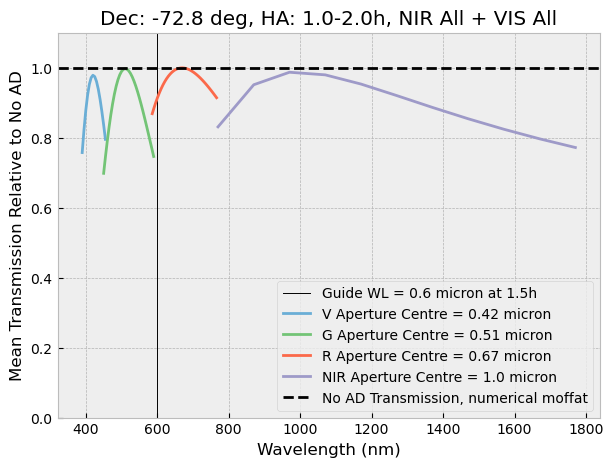

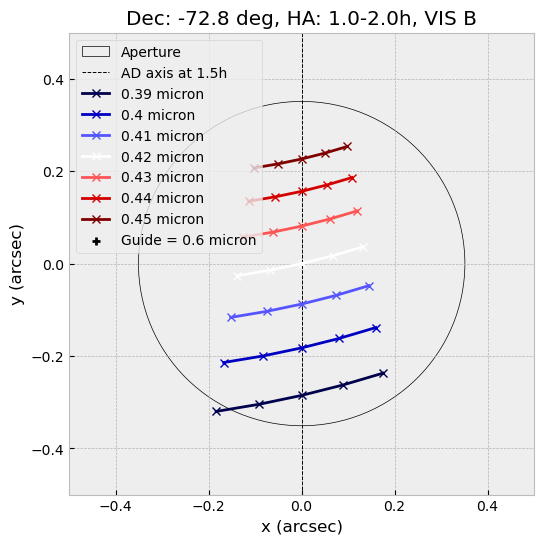

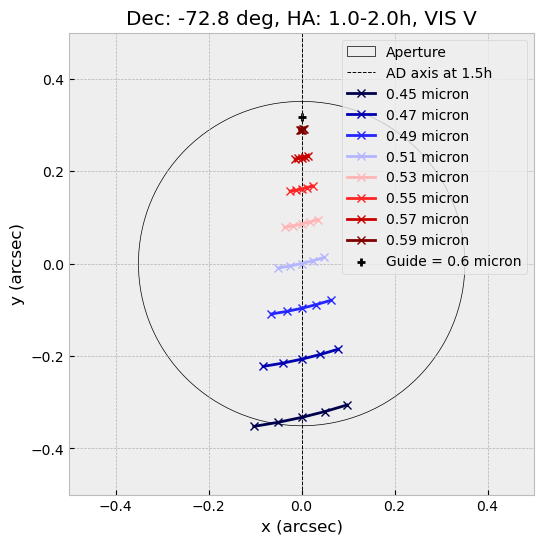

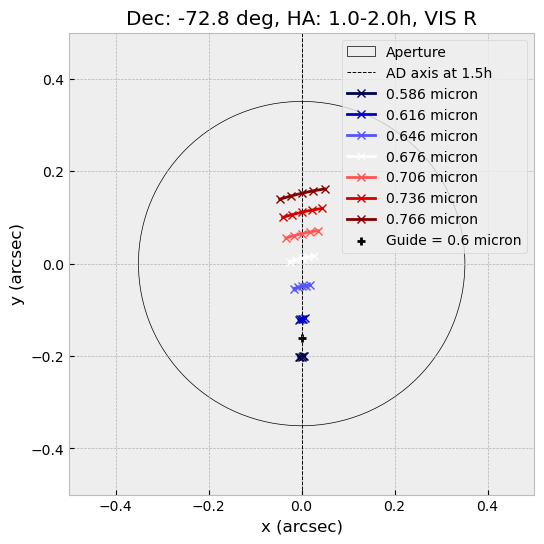

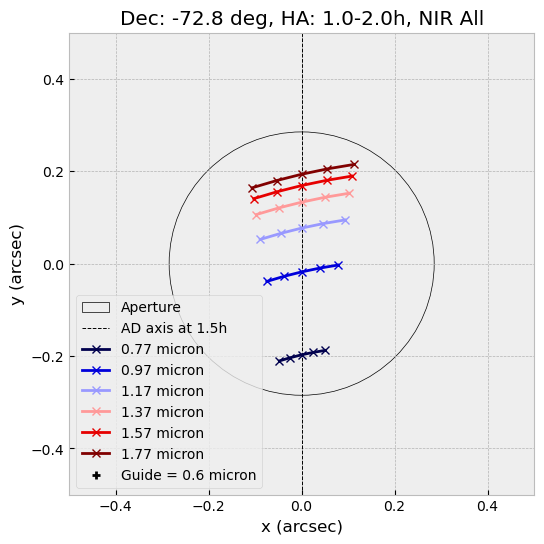

In [6]:
#To plot parallel graphs, it is much more compact as a function takes care of the bands.
analysis=AD_analysis()
analysis.conditions['pressure']=750* u.mBa
#Change values below for different parallel observing cases
HA_range=np.linspace(1,2,21)
targ_dec=-72.8*u.deg
centring="mid HA"
aperture_B=[.42]*u.micron
aperture_V=[.51]*u.micron
aperture_R=[.67]*u.micron
aperture_NIR=[1]*u.micron
guide=.6*u.micron

#Desired airmasses
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
#Calculates shifts/transmissions/mean transmission and plots
plot_parallel_integ_all(analysis,aperture_B,aperture_V,aperture_R,aperture_NIR,guide,method="numerical moffat",aperture="hexagons",sample_val=[5*u.nm,100*u.nm],centring=centring)

#Corresponding track plots to above graph. Number of HA values, and so centred_on, and sampling has changed to reduce information on the plot.
# #Two options for y-axis: "centring", which is +y axis is along centring index dispersion direction, or "PA" where +y axis is PA=0
analysis=AD_analysis()
analysis.load_band('LR','VIS','B','B',sampling=10*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(1,2,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_B[0],centring=centring)
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','V','V',sampling=20*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(1,2,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_V[0],centring=centring)
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','R','R',sampling=30*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(1,2,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_R[0],centring=centring)
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=200*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=np.linspace(1,2,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_NIR[0],centring=centring)
int_analysis.track_plot(analysis,y_axis="centring")


Target goes below Horizon above/below HA of +/- 6.0h
Target goes below Horizon above/below HA of +/- 6.0h
Target goes below Horizon above/below HA of +/- 6.0h
Target goes below Horizon above/below HA of +/- 6.0h
Target goes below Horizon above/below HA of +/- 6.0h


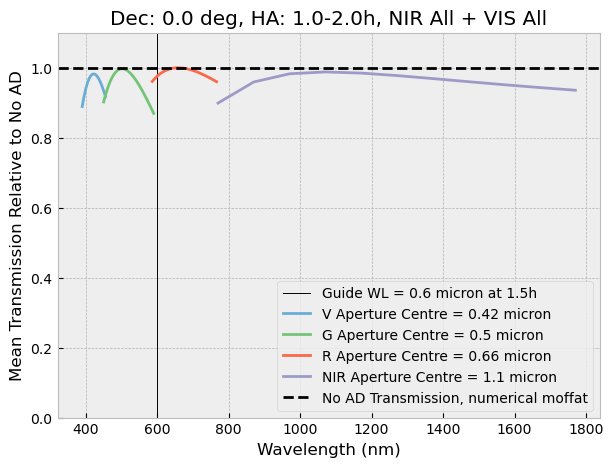

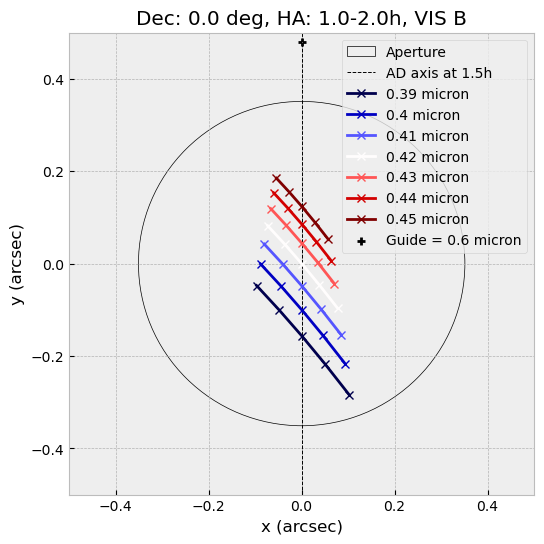

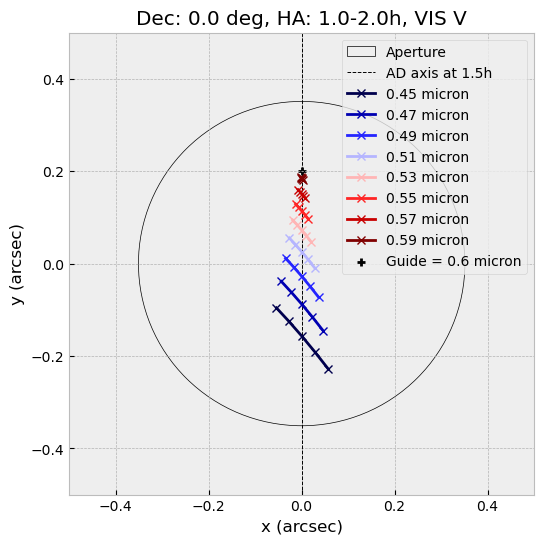

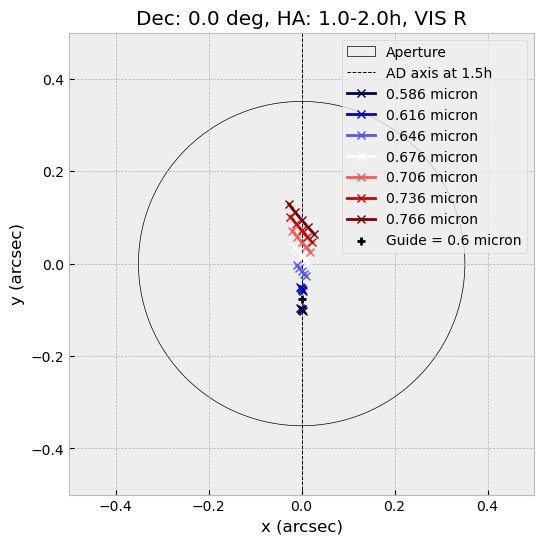

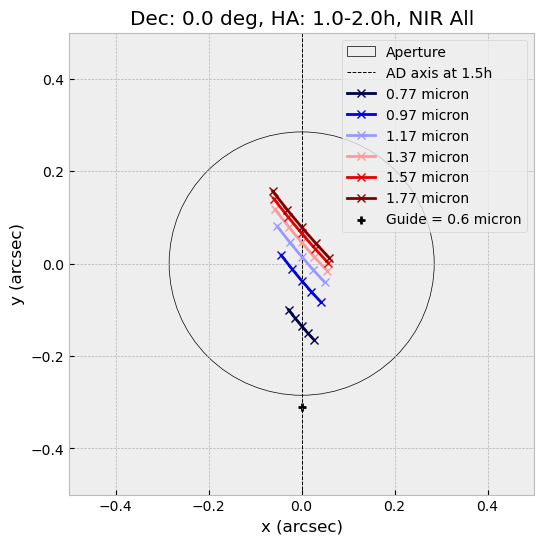

In [7]:
analysis=AD_analysis()

HA_range=np.linspace(1,2,21)
targ_dec=0*u.deg
centring="mid HA"
aperture_B=[.42]*u.micron
aperture_V=[.50]*u.micron
aperture_R=[.66]*u.micron
aperture_NIR=[1.1]*u.micron
guide=.6*u.micron

analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
plot_parallel_integ_all(analysis,aperture_B,aperture_V,aperture_R,aperture_NIR,guide,method="numerical moffat",aperture="hexagons",sample_val=[5*u.nm,100*u.nm],centring=centring,VIS_diameter=0.72*u.arcsec)

analysis=AD_analysis()
analysis.load_band('LR','VIS','B','B',sampling=10*u.nm) 
analysis.load_airmasses(HA_range=np.linspace(1,2,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_B[0],centring=centring)
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','V','V',sampling=20*u.nm) 
analysis.load_airmasses(HA_range=np.linspace(1,2,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_V[0],centring=centring)
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','R','R',sampling=30*u.nm) 
analysis.load_airmasses(HA_range=np.linspace(1,2,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_R[0],centring=centring)
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=200*u.nm) 
analysis.load_airmasses(HA_range=np.linspace(1,2,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_NIR[0],centring=centring)
int_analysis.track_plot(analysis,y_axis="centring")

## Parallel-Single Mode Graph

In [17]:
#Following function plots integration transmission average for parallel observations
def plot_parallel_integ_single(analysis,guide,aperture_VIS,aperture_NIR,VIS_band,normalise="no AD",method="numerical moffat",
                        aperture="hexagons",sample_val=[1*u.nm,1*u.nm],scale_val=0.01):  
    if VIS_band=="G":
        VIS_band="V"
        
    weights_VIS = np.arange(0, len(aperture_VIS)+2)
    norm_VIS = mpl.colors.Normalize(vmin=min(weights_VIS), vmax=max(weights_VIS))
    cmap_VIS = mpl.cm.ScalarMappable(norm=norm_VIS, cmap=mpl.cm.Blues)

    weights_NIR = np.arange(0, len(aperture_NIR)+2)
    norm_NIR = mpl.colors.Normalize(vmin=min(weights_NIR), vmax=max(weights_NIR))
    cmap_NIR= mpl.cm.ScalarMappable(norm=norm_NIR, cmap=mpl.cm.Reds)
       
    analysis.load_band("LR","VIS",VIS_band,VIS_band,sampling=sample_val[0])
    analysis.make_aperture(aperture,method,scale_val)
    integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,aperture_VIS,guide)
    print("Min, Max, Throughput = "+str(int_analysis.integ_metric(np.array(integ_transmissions)/np.array(opt_transmission))[0]))
    
    plt.figure(figsize=[7,5])
    
    
    if normalise == "none":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i),label='VIS Aperture Centre = {}'.format(aperture_VIS[count]),color=cmap_VIS.to_rgba(len(aperture_VIS)-count))
        plt.plot(analysis.output['wavelengths'],opt_transmission,color='black',linestyle='--')
    if normalise == "no AD":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i)/np.array(opt_transmission),label='VIS Aperture Centre = {}'.format(aperture_VIS[count]),color=cmap_VIS.to_rgba(len(aperture_VIS)-count))

    analysis.load_band("LR","NIR","IY","H",sampling=sample_val[1])
    analysis.make_aperture(aperture,method,scale_val)
    integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,aperture_NIR,guide)
    print("Min, Max, Throughput = "+str(int_analysis.integ_metric(np.array(integ_transmissions)/np.array(opt_transmission))[0]))
    if normalise == "none":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i),label='NIR Aperture Centre = {}'.format(aperture_NIR[count]),color=cmap_NIR.to_rgba(len(aperture_NIR)-count))
        plt.ylabel("Mean Transmission")        
        plt.plot(analysis.output['wavelengths'],opt_transmission,label='No AD Transmission',color='black',linestyle='--')
    if normalise == "no AD":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i)/np.array(opt_transmission),label='NIR Aperture Centre = {}'.format(aperture_NIR[count]),color=cmap_NIR.to_rgba(len(aperture_NIR)-count))
        plt.axhline(y=1,label='No AD Transmission, {}'.format(analysis.input['method']),color='black',linestyle='--')
        plt.ylabel("Mean Transmission Relative to No AD")
    plt.axvline(x=guide.value*1000,color='black',linewidth=0.7,label='Guide WL = {} at {}'.format(guide,analysis.input['centred_on']))
    plt.ylim(0,1.1)
    plt.xlabel("Wavelength (nm)")
    plt.title("Dec: {}, HA: {}-{}h, NIR All + VIS {}".format(targ_dec,analysis.input['HA_range'][0],analysis.input['HA_range'][-1],VIS_band))
    plt.legend()

Target goes below Horizon above/below HA of +/- 5.9h
Min, Max, Throughput = [0.7347401744435562, 0.9880469671745578, 0.9137725860474698]
Min, Max, Throughput = [0.8282020471617009, 0.9931212073238666, 0.9456987662680882]
Target goes below Horizon above/below HA of +/- 5.9h
Target goes below Horizon above/below HA of +/- 5.9h


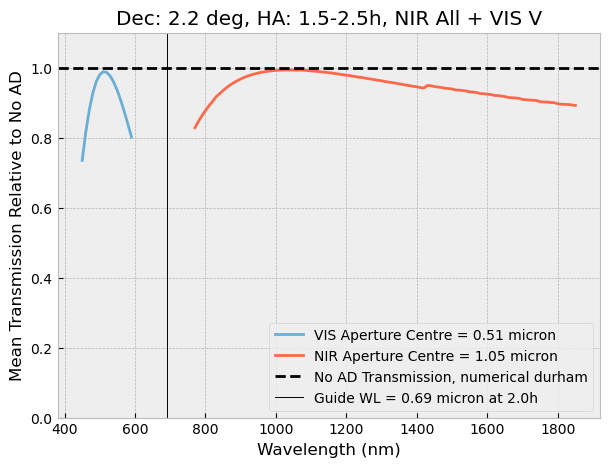

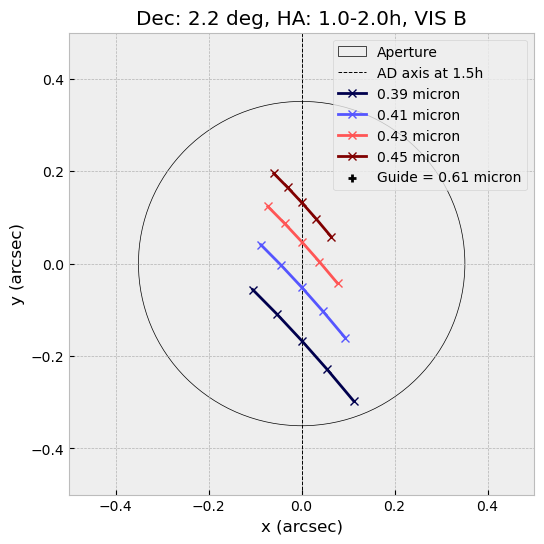

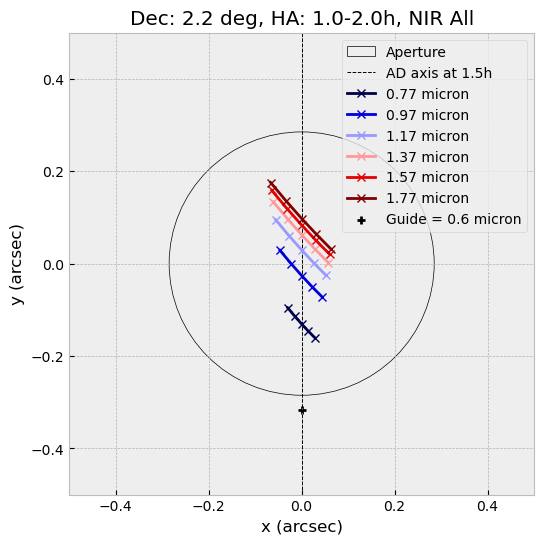

In [18]:
analysis=AD_analysis()
HA_range=np.linspace(1.5,2.5,21)
targ_dec=2.2*u.deg
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
plot_parallel_integ_single(analysis,0.69*u.micron,[.51]*u.micron,[1.05]*u.micron,"G",method="numerical durham",aperture="hexagons",sample_val=[10*u.nm,10*u.nm])

analysis=AD_analysis()
analysis.load_band('LR','VIS','B','B',sampling=20*u.nm) 
analysis.load_airmasses(HA_range=np.linspace(1,2,5),targ_dec=targ_dec)
analysis.calculate_shifts(.61*u.micron,.42*u.micron)
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=200*u.nm) 
analysis.load_airmasses(HA_range=np.linspace(1,2,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,1.05*u.micron)
int_analysis.track_plot(analysis,y_axis="centring")

Target goes below Horizon above/below HA of +/- 5.9h
Min, Max, Throughput = [0.7357174824736822, 0.9888526186041248, 0.914437527419347]
Min, Max, Throughput = [0.8280362309788144, 0.9922849528061637, 0.9446168030059022]


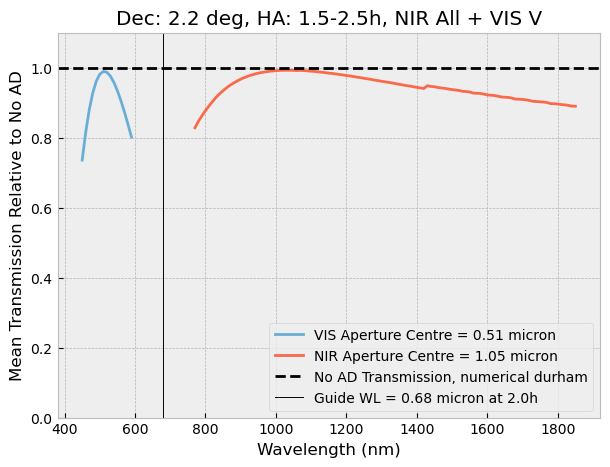

In [19]:
analysis=AD_analysis()
HA_range=np.linspace(1.5,2.5,21)
targ_dec=2.2*u.deg
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
plot_parallel_integ_single(analysis,0.68*u.micron,[.51]*u.micron,[1.05]*u.micron,"G",method="numerical durham",aperture="hexagons",sample_val=[10*u.nm,10*u.nm])

Target goes below Horizon above/below HA of +/- 6.9h
Min, Max, Throughput = [0.8825093332863085, 0.991212084175862, 0.9622209118344107]
Min, Max, Throughput = [0.933325146135149, 0.9964588485672818, 0.9792279583091092]


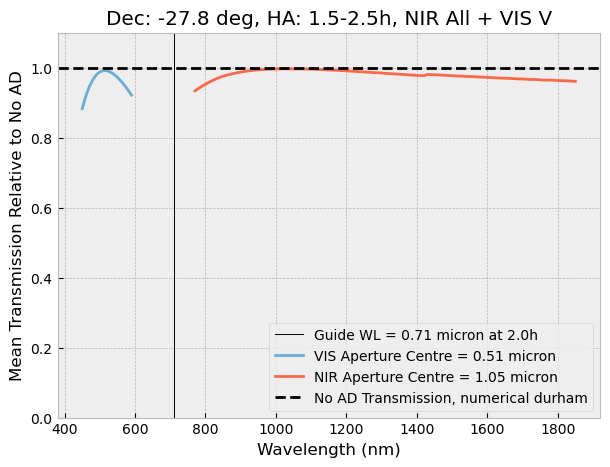

In [15]:
analysis=AD_analysis()
HA_range=np.linspace(1.5,2.5,21)
targ_dec=-27.8*u.deg
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
plot_parallel_integ_single(analysis,0.71*u.micron,[.51]*u.micron,[1.05]*u.micron,"G",method="numerical durham",aperture="hexagons",sample_val=[10*u.nm,10*u.nm])

Min, Max, Throughput = [0.5126501020677743, 0.9870113771862516, 0.8306656928681129]
Min, Max, Throughput = [0.6418665481198511, 0.9921643730271329, 0.8903119569450737]


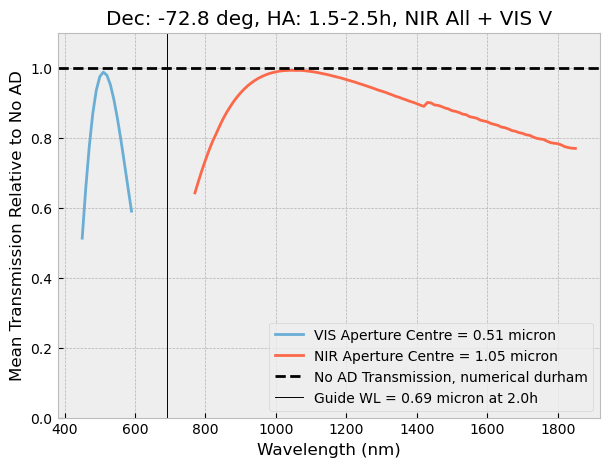

In [20]:
analysis=AD_analysis()
HA_range=np.linspace(1.5,2.5,21)
targ_dec=-72.8*u.deg
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
plot_parallel_integ_single(analysis,0.69*u.micron,[.51]*u.micron,[1.05]*u.micron,"G",method="numerical durham",aperture="hexagons",sample_val=[10*u.nm,10*u.nm])